#### Simple Linear Regression

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# any one of sklearn and statsmodels can be used to build models

import statsmodels
import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [4]:
ad = pd.read_csv("advertising.csv")
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
ad.shape

(200, 4)

In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


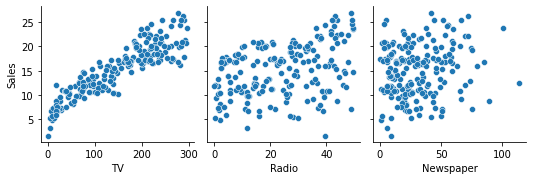

In [17]:
sns.pairplot(x_vars=["TV","Radio","Newspaper"],y_vars="Sales",data=ad)

<AxesSubplot:>

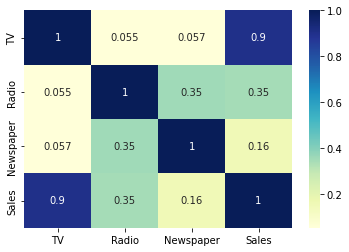

In [20]:
sns.heatmap(ad.corr(),annot=True,cmap="YlGnBu")

Steps:
- Create C and Y
- create train and test sets(70-30, 80-20)
- Train your model on training set(i.e. learn the coefficients)
- Evaluate the model(training set and test set)

In [22]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
# create X and y
X = ad["TV"]
y = ad["Sales"]

In [27]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [35]:
#train the model
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [36]:
X_train_sm = sm.add_constant(X_train)

In [37]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [53]:
#fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

sales = 6.94 + 0.05*TV

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1702.
Date:                Tue, 10 May 2022   Prob (F-statistic):                    7.37e-80
Time:                        13:42:37   Log-Likelihood:                         -406.08
No. Observations:                 140   AIC:                                      814.2
Df Residuals:                     139   BIC:                                      817.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0883      0.002     41.253      0.000       0.084       0.093
==============================================================================
Omnibus:                        6.994   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.073
Skew:                          -0.515   Prob(JB):                       0.0291
Kurtosis:                       2.612   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 1. coeff and p-value
- 2. R-sq is 81.6%, very high
- 3. p(F-statistic) is low => fit is not by chance

In [62]:
y_train_pred = lr_model.predict(X_train_sm)

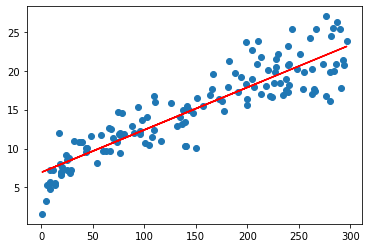

In [63]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr_model.params[0]+ lr_model.params[1]*X_train,"r")

In [48]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.52e-52
Time:                        13:36:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

lets check the assumption of LR, errors should be normally distributed, with mean = 0


### Residual Analysis

In [ ]:
# error = f(y_train, y_train_pred)

In [61]:
y_train_pred = lr_model.predict(X_train_sm)

In [64]:
res = y_train - y_train_pred

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

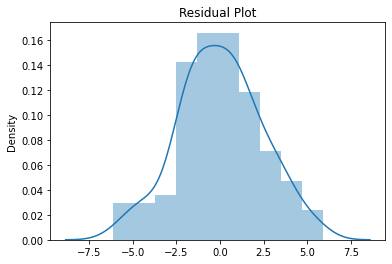

In [68]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

##### We can see, errors are normally distributed

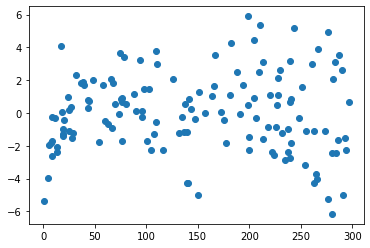

In [70]:
# look for patterns in residuals
plt.scatter(X_train, res)

In [ ]:
# uniformly scattered around y = 0, so model is good..

#### So, we can conclude, data is fit for linear regression

### Prediction on test set

In [73]:
#prediction on test set(y_test_pred)
# evaluate the model, r-sq, on test set

In [76]:
# add const on x_test as our model uses this for prediction
X_test_sm = sm.add_constant(X_test)

#pred on y_test
y_test_pred = lr_model.predict(X_test_sm)

In [80]:
#evaluate the model
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [81]:
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
r2

0.8157933136480389

In [82]:
#mean sq error

mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

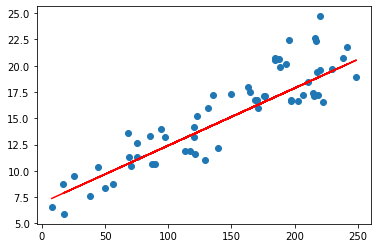

In [85]:
#viz on test set
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred,"r")
plt.show()

#### Linear Regression using SK LEARN 

In [ ]:
#using same train test split

In [91]:
#reshape X_train to (140,1) for sklearn
X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape
X_test_lm = X_test.values.reshape(-1,1)

In [92]:
#create object
lm = LinearRegression()
#fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [93]:
lm.coef_

array([0.05454575])

In [94]:
lm.intercept_

6.948683200001362

In [95]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [96]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.792103160124566

In [97]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480388